##  Plasma calculations with PlasmaPy

This notebook shows how to calculate various plasma parameters (Alfvén speed, plasma beta, Debye length, etc.) with MMS data and the PlasmaPy package. 


This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [1]:
#!pip install pyspedas

This line installs plasmapy, which is not installed by default when you install pyspedas.  If you already have it installed, you can comment this line out, or skip it.
For more information on plasmapy, see https://docs.plasmapy.org/


In [2]:
!pip install plasmapy


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Load the data
To get started, we import `pyspedas` and load the MMS data for October 16, 2015

In [3]:
import pyspedas

trange = ['2015-10-16/13:00', '2015-10-16/13:10']

pyspedas.projects.mms.fgm(trange=trange, data_rate='brst', time_clip=True)
pyspedas.projects.mms.fpi(datatype=['dis-moms', 'des-moms'], trange=trange, data_rate='brst', time_clip=True, center_measurement=True)

13-Jan-25 15:52:35: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016125604_v4.18.1.cdf
13-Jan-25 15:52:35: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130224_v4.18.1.cdf
13-Jan-25 15:52:35: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130334_v4.18.1.cdf
13-Jan-25 15:52:35: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf
13-Jan-25 15:52:35: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130904_v4.18.1.cdf
13-Jan-25 15:52:36: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016125604_v3.3.0.cdf
13-Jan-25 15:52:36: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130224_v3.3.0.cdf
13-Jan-25 15:52:36: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130334_v3.3.0.cdf
13-Jan-25 15:52:36: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms1_des_errorflags_brst',
 'mms1_des_compressionloss_brst',
 'mms1_des_steptable_parity_brst',
 'mms1_des_startdelphi_count_brst',
 'mms1_des_startdelphi_angle_brst',
 'mms1_des_sector_despinp_brst',
 'mms1_des_pitchangdist_lowen_brst',
 'mms1_des_pitchangdist_miden_brst',
 'mms1_des_pitchangdist_highen_brst',
 'mms1_des_energyspectr_px_brst',
 'mms1_des_energyspectr_mx_brst',
 'mms1_des_energyspectr_py_brst',
 'mms1_des_energyspectr_my_brst',
 'mms1_des_energyspectr_pz_brst',
 'mms1_des_energyspectr_mz_brst',
 'mms1_des_energyspectr_par_brst',
 'mms1_des_energyspectr_anti_brst',
 'mms1_des_energyspectr_perp_brst',
 'mms1_des_energyspectr_omni_brst',
 'mms1_des_numberdensity_brst',
 'mms1_des_numberdensity_err_brst',
 'mms1_des_densityextrapolation_low_brst',
 'mms1_des_densityextrapolation_high_brst',
 'mms1_des_bulkv_dbcs_brst',
 'mms1_des_bulkv_spintone_dbcs_brst',
 'mms1_des_bulkv_gse_brst',
 'mms1_des_bulkv_spintone_gse_brst',
 '

### Interpolate to a common set of times

Now we need to interpolate the B-field and DES (electron) data to the DIS (ion) time stamps


Note: tinterpol creates a new variable containing the interpolated output with the suffix '-itrp'

In [4]:
from pyspedas import tinterpol
tinterpol('mms1_fgm_b_gse_brst_l2_btot', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_numberdensity_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_temppara_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_tempperp_brst', 'mms1_dis_numberdensity_brst')

13-Jan-25 15:52:37: tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_btot-itrp
13-Jan-25 15:52:37: tinterpol (linear) was applied to: mms1_des_numberdensity_brst-itrp
13-Jan-25 15:52:37: tinterpol (linear) was applied to: mms1_des_temppara_brst-itrp
13-Jan-25 15:52:37: tinterpol (linear) was applied to: mms1_des_tempperp_brst-itrp


In [5]:
tinterpol('mms1_fgm_b_gse_brst_l2_bvec', 'mms1_dis_numberdensity_brst')

13-Jan-25 15:52:37: tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_bvec-itrp


### Extract the data values

In [6]:
from pyspedas import get
fgm_b = get('mms1_fgm_b_gse_brst_l2_btot-itrp')
dis_n = get('mms1_dis_numberdensity_brst')
dis_Tpara = get('mms1_dis_temppara_brst')
dis_Tperp = get('mms1_dis_tempperp_brst')
des_n = get('mms1_des_numberdensity_brst-itrp')
des_Tpara = get('mms1_des_temppara_brst-itrp')
des_Tperp = get('mms1_des_tempperp_brst-itrp')

### Calculate T from Tpara and Tperp

Temperature data released by the FPI team come as parallel and perpendicular components; to calculate plasma parameters, we'll need the total temperature.

For details on this calculation, please see the FPI Data Product Guide:

https://lasp.colorado.edu/galaxy/pages/viewpage.action?pageId=37618954

In [7]:
dis_T = (dis_Tpara.y + 2*dis_Tperp.y)/3.0
des_T = (des_Tpara.y + 2*des_Tperp.y)/3.0

### Add units to the data

PlasmaPy requires us to specify the units of the data using `astropy` units

In [8]:
from astropy import units as u
B = fgm_b.y
n_i = dis_n.y
n_e = des_n.y
T_i = dis_T
T_e = des_T

Now that we have some data loaded, we'll calculate some plasma parameters

In [9]:
!pip install plasmapy


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import plasmapy

### Alfvén speed

In [11]:
Va = plasmapy.formulary.speeds.Alfven_speed(B, n_i, 'p')

# convert to km / s
Va = Va.to(u.km / u.s)

### Plasma beta

In [12]:
# ions
beta_i = plasmapy.formulary.dimensionless.beta(T_i, n_i, B)

# electrons
beta_e = plasmapy.formulary.dimensionless.beta(T_e, n_e, B)

# combined
beta = beta_i + beta_e

### Ion inertial length

In [13]:
d_i = plasmapy.formulary.lengths.inertial_length(n_i, 'p+')

### Debye length

In [14]:
lamda_d = plasmapy.formulary.lengths.Debye_length(T_e, n_e)

### Ion gyrofrequency

In [15]:
omega_ci = plasmapy.formulary.frequencies.gyrofrequency(B, 'p', to_hz=True)

### Ion gyroradius

In [16]:
r_i = plasmapy.formulary.lengths.gyroradius(B, 'p', T=T_i)

# convert to km
r_i = r_i.to(u.km)

### Lower hybrid frequency

In [17]:
omega_lh = plasmapy.formulary.frequencies.lower_hybrid_frequency(B, n_i, 'p', to_hz=True)

### Upper hybrid frequency

In [18]:
omega_uh = plasmapy.formulary.frequencies.upper_hybrid_frequency(B, n_e, to_hz=True)

### Save the data in tplot variables

In [19]:
from pyspedas import store_data
store_data('alfven_speed', data={'x': fgm_b.times, 'y': Va})
store_data('plasma_beta', data={'x': fgm_b.times, 'y': beta})
store_data('ion_inertial_length', data={'x': fgm_b.times, 'y': d_i})
store_data('debye_length', data={'x': fgm_b.times, 'y': lamda_d})
store_data('omega_ci', data={'x': fgm_b.times, 'y': omega_ci})
store_data('ion_gyroradius', data={'x': fgm_b.times, 'y': r_i})
store_data('omega_lh', data={'x': fgm_b.times, 'y': omega_lh})
store_data('omega_uh', data={'x': fgm_b.times, 'y': omega_uh})

True

### Set some plot metadata

In [20]:
from pyspedas import options
options('alfven_speed', 'ytitle', 'Va \\ (' + str(Va.unit) + ')')
options('alfven_speed', 'legend_names', 'Alfvén speed')
options('plasma_beta', 'ytitle', 'Beta')
options('plasma_beta', 'legend_names', 'Plasma Beta')
options('ion_inertial_length', 'ytitle', 'd_i \\ (' + str(d_i.unit) + ')')
options('ion_inertial_length', 'legend_names', 'Ion inertial length')
options('debye_length', 'ytitle', 'Lamda_d \\ (' + str(lamda_d.unit) + ')')
options('debye_length', 'legend_names', 'Debye length')
options('omega_ci', 'ytitle', 'omega_ci \\ (' + str(omega_ci.unit) + ')')
options('omega_ci', 'legend_names', 'Ion gyrofrequency')
options('ion_gyroradius', 'ytitle', 'r_i \\ (' + str(r_i.unit) + ')')
options('ion_gyroradius', 'legend_names', 'Ion gyroradius')
options('omega_uh', 'ytitle', 'omega_uh \\ (' + str(omega_uh.unit) + ')')
options('omega_uh', 'legend_names', 'Upper hybrid frequency')
options('omega_lh', 'ytitle', 'omega_lh \\ (' + str(omega_lh.unit) + ')')
options('omega_lh', 'legend_names', 'Lower hybrid frequency')

### Plot the results

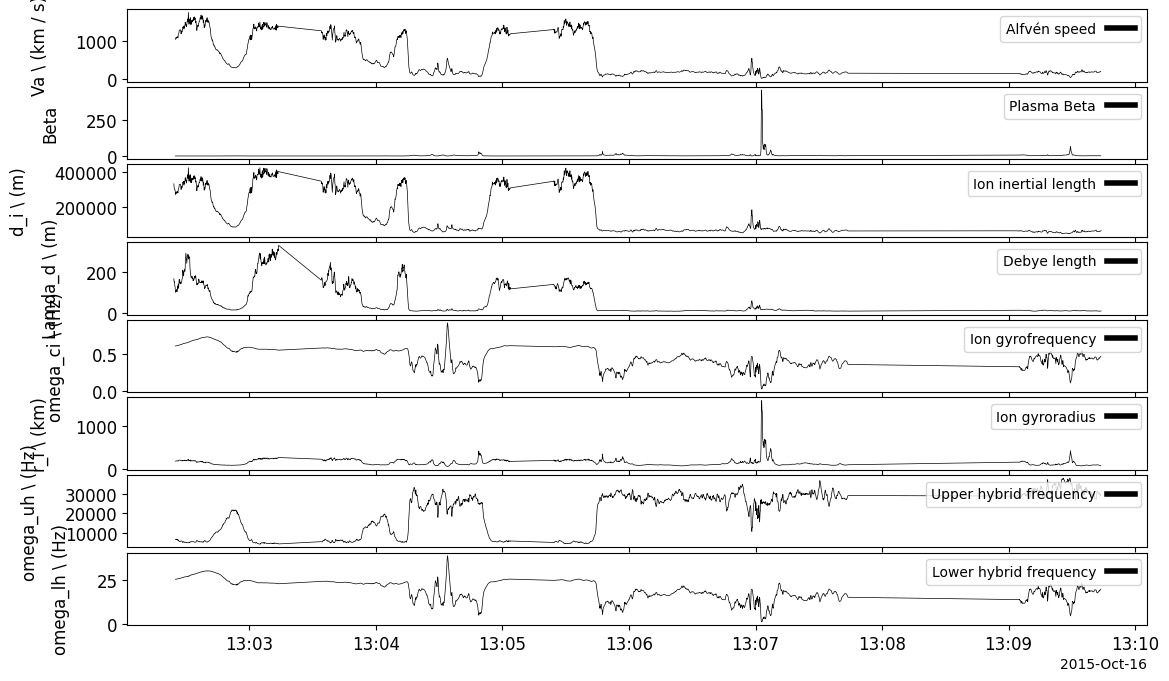

In [21]:
from pyspedas import tplot
tplot(['alfven_speed',
       'plasma_beta',
       'ion_inertial_length',
       'debye_length',
       'omega_ci',
       'ion_gyroradius',
       'omega_uh',
       'omega_lh'])